In [1]:
print("Python běží!")

Python běží!


In [2]:
import sys
!{sys.executable} -m pip install -r requirements.txt

sys.path.append('../')
sys.path.append('../my_libs/')
sys.path.append('../my_libs/img/')

import my_libs as ml

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not open requirements file: [Errno 2] Adresář nebo soubor neexistuje: 'requirements.txt'


# Cvičení 3

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [11]:
def find_pictures(folder, file_type: str = ["jpg"]):
    cwd = os.getcwd()
    folder = os.path.join(cwd, folder)
    picture_files = []
    print("Current working directory: {0}, files: ".format(cwd))
    for file in os.listdir(folder):
        # TODO: get file format
        print(file)
        picture_files.append(os.path.join(folder, file))
    return picture_files


def load_images(picture_files: list[str]) -> list[np.ndarray]:
    """ Load images from files
    get:
        picture_files - list of files
    return:
        images - list of images
    """
    images = []
    for file in picture_files:
        bgr = cv2.imread(file)
        rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
        images.append(rgb)
    return images


def convert_images_to_gray(images: list[np.ndarray]) -> list[np.ndarray]:
    gray_images = []
    for image in images:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        gray_images.append(gray)
    return gray_images

def convert_images_to_HSW(images: list[np.ndarray]) -> list[np.ndarray]:
    hsw_images = []
    for image in images:
        hsw = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        hsw_images.append(hsw)
    return hsw_images


def calculate_histogram(images) -> list:
    histograms = []
    for image in images:
        h, be = np.histogram(image, bins=256, range=(0, 255))
        histograms.append(h)
    return histograms


def histogram_distances_from(histograms, i: int) -> np.ndarray:
    """ Calculate distances from histogram i to all other histograms
    get:
        histograms - list of histograms
        i - index of histogram
    return:
        distances - np.ndarray of distances
    """
    hist = histograms[i]
    distances = []
    for j, h in enumerate(histograms):
        if i == j:
            distances.append(0)
        else:
            distances.append(np.linalg.norm(hist-h))
    distances = np.array(distances)
    return distances


In [9]:
# Load image
folder = 'data/'
picture_files = find_pictures(folder)
picture_files.sort()
number_of_images = len(picture_files)

images = load_images(picture_files)

Current working directory: /home/pytel/Skola/TUL-navazující_studium/3. semestr/PVI-Pocitacove_videni/cviceni/cv03, files: 
pvi_cv03_im06.jpg
pvi_cv03_im07.jpg
pvi_cv03_im03.jpg
pvi_cv03_im08.jpg
pvi_cv03_im04.jpg
pvi_cv03_im01.jpg
pvi_cv03_im02.jpg
pvi_cv03_im09.jpg
pvi_cv03_im05.jpg


## Provnání podle histogramu gray složky

Sorted images:
[0 3 2 1 5 6 8 7 4]
[1 2 3 5 0 6 8 7 4]
[2 1 5 3 6 8 7 0 4]
[3 0 2 1 5 7 6 8 4]
[4 5 6 7 8 2 1 3 0]
[5 2 8 6 7 1 3 4 0]
[6 8 7 5 2 1 4 3 0]
[7 6 8 5 2 1 4 3 0]
[8 6 7 5 2 1 4 3 0]


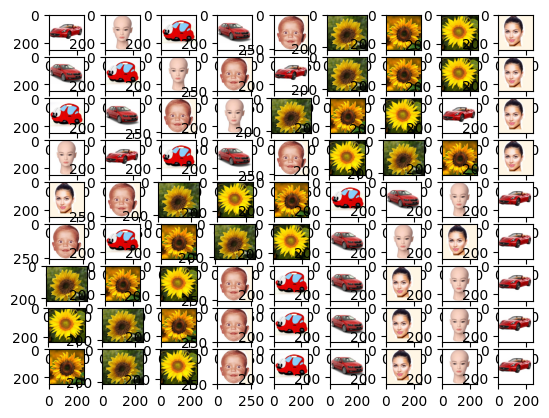

In [8]:
histograms = calculate_histogram(convert_images_to_gray(images))

# show images
plt.figure()
print("Sorted images:")
for i, image in enumerate(images):
    distances = histogram_distances_from(histograms, i)

    # sort distances
    sorted_indices = np.argsort(distances)
    print(sorted_indices)

    # show images
    for j, img_index in enumerate(sorted_indices):
        plt.subplot(number_of_images, number_of_images,
                    number_of_images*i+j+1)
        plt.imshow(images[img_index])

plt.show()

## Provnání podle histogramu Hue složky

Sorted images:
[0 1 3 2 5 8 7 6 4]
[1 0 2 3 5 7 8 6 4]
[2 3 1 0 5 8 7 6 4]
[3 2 1 0 5 8 7 6 4]
[4 5 8 7 6 2 3 1 0]
[5 7 8 6 4 2 3 1 0]
[6 7 8 5 4 2 3 1 0]
[7 8 6 5 4 2 3 1 0]
[8 7 6 5 4 2 3 1 0]


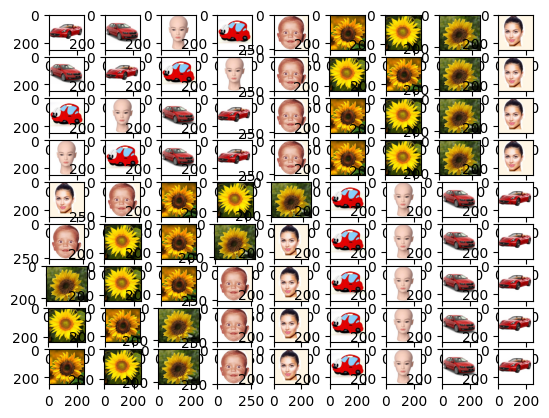

In [12]:
histograms = calculate_histogram(convert_images_to_HSW(images))

# show images
plt.figure()
print("Sorted images:")
for i, image in enumerate(images):
    distances = histogram_distances_from(histograms, i)

    # sort distances
    sorted_indices = np.argsort(distances)
    print(sorted_indices)

    # show images
    for j, img_index in enumerate(sorted_indices):
        plt.subplot(number_of_images, number_of_images,
                    number_of_images*i+j+1)
        plt.imshow(images[img_index])

plt.show()

## Provnání podle vektoru DCT složky

Naprogramujte funkci, která vypočte a zobrazí 2D amplitudové spektrum 
(z 2D DFT) pro libovolný (šedotónový) obrázek. Přeskupte kvadranty spektra, 
aby  uprostřed  byly  nízké  frekvence.  Zobrazujte  logaritmus  z  absolutní 
hodnoty, spolu s colorbarem.